In [4]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import re
import multiprocessing
from collections import Counter
import itertools
import json
from IPython.display import display as disp

import numpy as np
# import bottleneck as bn
import pandas as pd
import networkx as nx
# import igraph as ig
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='paper', style='whitegrid', color_codes=True, font_scale=1.8)
colorcycle = [(0.498, 0.788, 0.498),
              (0.745, 0.682, 0.831),
              (0.992, 0.753, 0.525),
              (0.220, 0.424, 0.690),
              (0.749, 0.357, 0.090),
              (1.000, 1.000, 0.600),
              (0.941, 0.008, 0.498),
              (0.400, 0.400, 0.400)]
%matplotlib inline
sns.set_palette(colorcycle)
mpl.rcParams['figure.max_open_warning'] = 65
mpl.rcParams['figure.figsize'] = [12, 7]

# import warnings
# warnings.simplefilter("ignore", category=DeprecationWarning)
# warnings.simplefilter("ignore", category=mpl.cbook.mplDeprecation)
# warnings.simplefilter("ignore", category=UserWarning)


pd.set_option('display.max_rows', 55)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 1000)
np.set_printoptions(linewidth=145)

# import pixiedust

In [10]:
df = pd.DataFrame([dict(learning_rate=0.5, max_depth=6, n_estimators=361, score=0.8572886225169964, total=437.3),
dict(learning_rate=0.5, max_depth=6, n_estimators=361, score=0.8579488977705011, total=436.8),
dict(learning_rate=0.5, max_depth=5, n_estimators=993, score=0.8581683660500624, total=816.5),
dict(learning_rate=0.5, max_depth=5, n_estimators=993, score=0.8577768749116115, total=814.4),
dict(learning_rate=0.5, max_depth=5, n_estimators=993, score=0.8570494440380545, total=816.7),
dict(learning_rate=0.5, max_depth=6, n_estimators=361, score=0.8568640187911817, total=443.5),
dict(learning_rate=0.5, max_depth=6, n_estimators=361, score=0.8576974742655494, total=447.6),
dict(learning_rate=0.5, max_depth=6, n_estimators=428, score=0.857087207372628, total=517.6),
dict(learning_rate=0.5, max_depth=6, n_estimators=428, score=0.856636298120035, total=515.7),
dict(learning_rate=0.5, max_depth=6, n_estimators=428, score=0.8576886376964934, total=523.3),
dict(learning_rate=0.5, max_depth=6, n_estimators=428, score=0.8573975705711282, total=518.2),
dict(learning_rate=0.5, max_depth=7, n_estimators=155, score=0.8571767637013596, total=294.1),
dict(learning_rate=0.5, max_depth=7, n_estimators=155, score=0.8578857697953154, total=294.5),
dict(learning_rate=0.5, max_depth=6, n_estimators=506, score=0.8568117424957786, total=606.9),
dict(learning_rate=0.5, max_depth=6, n_estimators=506, score=0.8571115640331645, total=610.2),
dict(learning_rate=0.5, max_depth=6, n_estimators=506, score=0.8563830987659724, total=611.5),
dict(learning_rate=0.5, max_depth=6, n_estimators=506, score=0.8573871732980038, total=612.6),
dict(learning_rate=0.5, max_depth=7, n_estimators=155, score=0.8567341343970949, total=295.3),
dict(learning_rate=0.5, max_depth=7, n_estimators=155, score=0.8575191706211149, total=293.6),
dict(learning_rate=0.5, max_depth=6, n_estimators=599, score=0.8561418347590212, total=716.4),
dict(learning_rate=0.5, max_depth=6, n_estimators=599, score=0.8570442275281874, total=718.3),
dict(learning_rate=0.5, max_depth=6, n_estimators=599, score=0.8564232421239928, total=723.1),
dict(learning_rate=0.5, max_depth=6, n_estimators=599, score=0.8568376931861341, total=720.4),
dict(learning_rate=0.5, max_depth=7, n_estimators=184, score=0.8568582044033364, total=345.2),
dict(learning_rate=0.5, max_depth=7, n_estimators=184, score=0.8575889902201108, total=346.3),
dict(learning_rate=0.5, max_depth=7, n_estimators=184, score=0.8564078681653615, total=345.0),
dict(learning_rate=0.5, max_depth=7, n_estimators=184, score=0.8572182810281133, total=348.2),
dict(learning_rate=0.5, max_depth=6, n_estimators=709, score=0.8560675178754895, total=838.1),
dict(learning_rate=0.5, max_depth=6, n_estimators=709, score=0.8567436077123732, total=859.3),
dict(learning_rate=0.5, max_depth=7, n_estimators=218, score=0.8562712713082528, total=394.4),
dict(learning_rate=0.5, max_depth=6, n_estimators=709, score=0.8557572144162993, total=860.6),
dict(learning_rate=0.5, max_depth=6, n_estimators=709, score=0.8563762137954738, total=865.3),
dict(learning_rate=0.5, max_depth=7, n_estimators=218, score=0.8568545385814088, total=396.2),
dict(learning_rate=0.5, max_depth=7, n_estimators=218, score=0.8565029156971917, total=419.2),
dict(learning_rate=0.5, max_depth=7, n_estimators=218, score=0.8572641235000099, total=421.5),
dict(learning_rate=0.5, max_depth=7, n_estimators=258, score=0.8561430332826847, total=499.4),
dict(learning_rate=0.5, max_depth=7, n_estimators=258, score=0.8569047115958326, total=499.3),
dict(learning_rate=0.5, max_depth=6, n_estimators=839, score=0.8556746998724274, total=975.9),
dict(learning_rate=0.5, max_depth=7, n_estimators=258, score=0.8557694578071674, total=501.1),
dict(learning_rate=0.5, max_depth=7, n_estimators=258, score=0.8565165849707803, total=501.1),
dict(learning_rate=0.5, max_depth=6, n_estimators=839, score=0.8563632463269377, total=1021.3),
dict(learning_rate=0.5, max_depth=6, n_estimators=839, score=0.8553454961187813, total=1028.5),
dict(learning_rate=0.5, max_depth=6, n_estimators=839, score=0.8559112649662665, total=1028.5),
dict(learning_rate=0.5, max_depth=7, n_estimators=305, score=0.8552888600960447, total=533.0),
dict(learning_rate=0.5, max_depth=7, n_estimators=305, score=0.8557571880416719, total=535.0),
dict(learning_rate=0.5, max_depth=7, n_estimators=305, score=0.8559769797501893, total=533.6),
dict(learning_rate=0.5, max_depth=7, n_estimators=305, score=0.8564841310270921, total=599.2),
dict(learning_rate=0.5, max_depth=6, n_estimators=993, score=0.8552061173472305, total=1130.1),
dict(learning_rate=0.5, max_depth=6, n_estimators=993, score=0.8559898425484044, total=1133.2),
dict(learning_rate=0.5, max_depth=6, n_estimators=993, score=0.8549665772824809, total=1135.8),
dict(learning_rate=0.5, max_depth=7, n_estimators=361, score=0.8552679845642583, total=625.0),
dict(learning_rate=0.5, max_depth=7, n_estimators=361, score=0.8559853782993988, total=625.3),
dict(learning_rate=0.5, max_depth=7, n_estimators=361, score=0.8549599921552542, total=627.8),
dict(learning_rate=0.5, max_depth=6, n_estimators=993, score=0.8554947794371398, total=1223.5),
dict(learning_rate=0.5735535121130826, max_depth=5, n_estimators=155, score=0.8583261684934234, total=112.1),
dict(learning_rate=0.5735535121130826, max_depth=5, n_estimators=155, score=0.8588369552465676, total=113.4),
dict(learning_rate=0.5, max_depth=7, n_estimators=361, score=0.8555201582489823, total=708.2),
dict(learning_rate=0.5735535121130826, max_depth=5, n_estimators=155, score=0.8578512291875129, total=129.4),
dict(learning_rate=0.5, max_depth=7, n_estimators=428, score=0.8546247067565342, total=741.8),
dict(learning_rate=0.5735535121130826, max_depth=5, n_estimators=155, score=0.8586484155426808, total=112.6),
dict(learning_rate=0.5735535121130826, max_depth=5, n_estimators=184, score=0.8582961488230867, total=134.3),
dict(learning_rate=0.5735535121130826, max_depth=5, n_estimators=184, score=0.8587433147508545, total=151.6),
dict(learning_rate=0.5, max_depth=7, n_estimators=428, score=0.8544268829147998, total=745.7),
dict(learning_rate=0.5735535121130826, max_depth=5, n_estimators=184, score=0.8586459737943946, total=135.2),
dict(learning_rate=0.5735535121130826, max_depth=5, n_estimators=184, score=0.8578315349360752, total=153.2),
dict(learning_rate=0.5735535121130826, max_depth=5, n_estimators=218, score=0.8582809907527438, total=159.2),
dict(learning_rate=0.5, max_depth=7, n_estimators=428, score=0.8554137649342776, total=842.7),
dict(learning_rate=0.5, max_depth=7, n_estimators=428, score=0.8548639321626348, total=845.0),
dict(learning_rate=0.5735535121130826, max_depth=5, n_estimators=218, score=0.8587444642344167, total=162.2),
dict(learning_rate=0.5, max_depth=7, n_estimators=506, score=0.8548065579334709, total=884.9),
dict(learning_rate=0.5735535121130826, max_depth=5, n_estimators=218, score=0.8578321361445047, total=176.7),
dict(learning_rate=0.5735535121130826, max_depth=5, n_estimators=218, score=0.8585683855510062, total=165.9),
dict(learning_rate=0.5, max_depth=7, n_estimators=506, score=0.854030129117962, total=990.8),
dict(learning_rate=0.5, max_depth=7, n_estimators=506, score=0.854030103645848, total=986.3),
dict(learning_rate=0.5735535121130826, max_depth=5, n_estimators=258, score=0.8582241490206546, total=200.4),
dict(learning_rate=0.5, max_depth=7, n_estimators=506, score=0.8536185944730765, total=997.7),
dict(learning_rate=0.5735535121130826, max_depth=5, n_estimators=258, score=0.8587177711011298, total=206.1),
dict(learning_rate=0.5735535121130826, max_depth=5, n_estimators=258, score=0.8577327731757446, total=205.9),
dict(learning_rate=0.5735535121130826, max_depth=5, n_estimators=258, score=0.8585259651622467, total=206.2),
dict(learning_rate=0.5735535121130826, max_depth=5, n_estimators=305, score=0.858166063094183, total=241.4),
dict(learning_rate=0.5735535121130826, max_depth=5, n_estimators=305, score=0.8586567441701056, total=242.9),
dict(learning_rate=0.5735535121130826, max_depth=5, n_estimators=305, score=0.8576808192652134, total=243.4),
dict(learning_rate=0.5735535121130826, max_depth=5, n_estimators=305, score=0.8584442371004216, total=241.0),
dict(learning_rate=0.5, max_depth=7, n_estimators=599, score=0.8527884041188358, total=1070.7),
dict(learning_rate=0.5735535121130826, max_depth=5, n_estimators=361, score=0.858072425819204, total=286.8),
dict(learning_rate=0.5, max_depth=7, n_estimators=599, score=0.8532919629393039, total=1157.0),
dict(learning_rate=0.5, max_depth=7, n_estimators=599, score=0.8540289184369116, total=1159.0),
dict(learning_rate=0.5, max_depth=7, n_estimators=599, score=0.853250866891657, total=1157.6),
dict(learning_rate=0.5735535121130826, max_depth=5, n_estimators=361, score=0.8586082915798507, total=284.5),
dict(learning_rate=0.5735535121130826, max_depth=5, n_estimators=361, score=0.8576132730656674, total=283.1),
dict(learning_rate=0.5735535121130826, max_depth=5, n_estimators=361, score=0.8583897418819868, total=293.5),
dict(learning_rate=0.5735535121130826, max_depth=5, n_estimators=428, score=0.8579976976160663, total=333.7)])

In [16]:
df = df.rename(columns=misc.snake2word(df.columns))

In [18]:
df['learning rate'].value_counts() 

0.500000    67
0.573554    25
Name: learning rate, dtype: int64

In [20]:
df['max depth'].value_counts() 

7    36
6    28
5    28
Name: max depth, dtype: int64

In [23]:
df['n estimators'].value_counts() 

361    12
428     9
506     8
218     8
599     8
184     8
305     8
155     8
258     8
993     7
839     4
709     4
Name: n estimators, dtype: int64

In [41]:
toplot = df.groupby('n estimators').score.agg(['mean', 'std', 'count'])
toplot.head() 

,mean,std,count
n estimators,,,
155,0.857872,0.000721,8
184,0.857699,0.000843,8
218,0.857540,0.000954,8
258,0.857317,0.001134,8
305,0.857057,0.001332,8


Text(0,0.5,'AUC score')

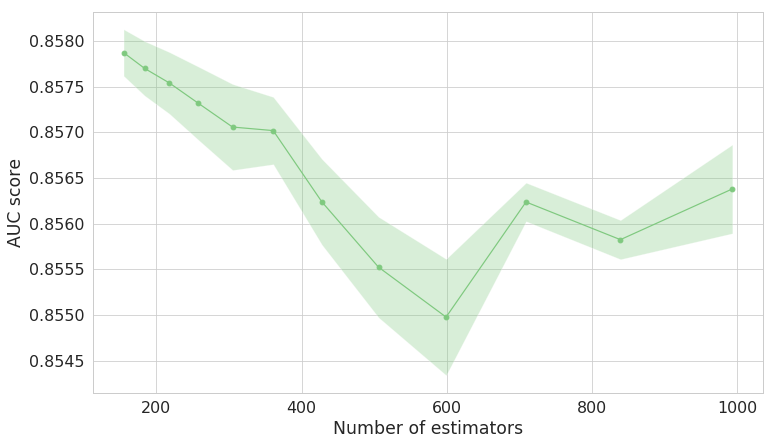

In [45]:
fig, ax = plt.subplots()
ax.plot(toplot['mean'], 'o-')
ax.fill_between(toplot.index,
                toplot['mean']+toplot['std']/np.sqrt(toplot['count']),
                toplot['mean']-toplot['std']/np.sqrt(toplot['count']),
                alpha=0.3)
ax.set_xlabel("Number of estimators")
ax.set_ylabel("AUC score")

In [46]:
toplot = df.groupby('max depth').score.agg(['mean', 'std', 'count'])
toplot.head() 

,mean,std,count
max depth,,,
5,0.858230,0.000438,28
6,0.856523,0.000797,28
7,0.855668,0.001364,36


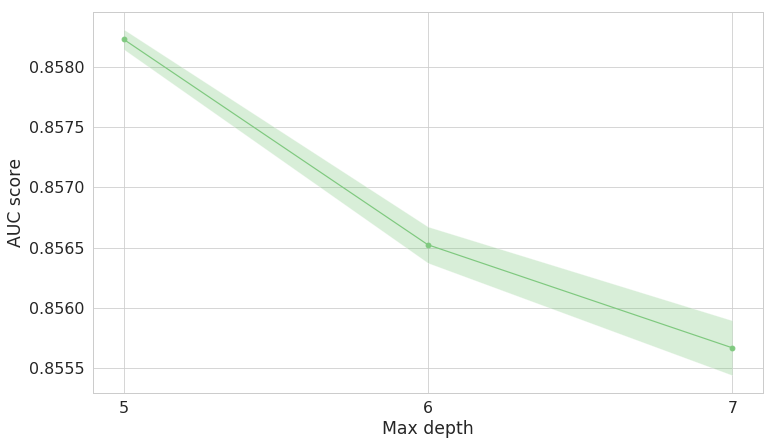

In [49]:
fig, ax = plt.subplots()
ax.plot(toplot['mean'], 'o-')
ax.fill_between(toplot.index,
                toplot['mean']+toplot['std']/np.sqrt(toplot['count']),
                toplot['mean']-toplot['std']/np.sqrt(toplot['count']),
                alpha=0.3)
ax.set_xlabel("Max depth")
ax.set_ylabel("AUC score")
ax.set_xticks([5, 6, 7])

In [53]:
toplot = df.groupby('learning rate').score.agg(['mean', 'std', 'count'])
toplot['std iid'] = toplot['std'] / np.sqrt(toplot['count'])
toplot.head() 

,mean,std,count,std iid
learning rate,,,,
0.500000,0.856115,0.001243,67,0.000152
0.573554,0.858297,0.000380,25,0.000076


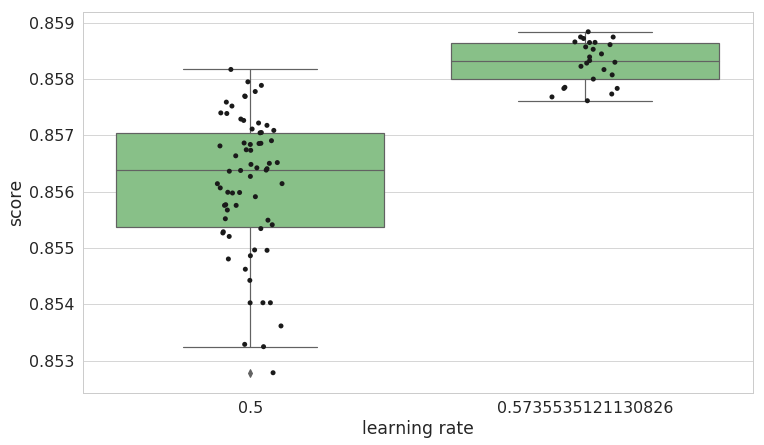

In [81]:
fig, ax = plt.subplots() 
sns.boxplot(data=df, y='score', x='learning rate', color=colorcycle[0])
sns.stripplot(data=df, y='score', x='learning rate', color='k')

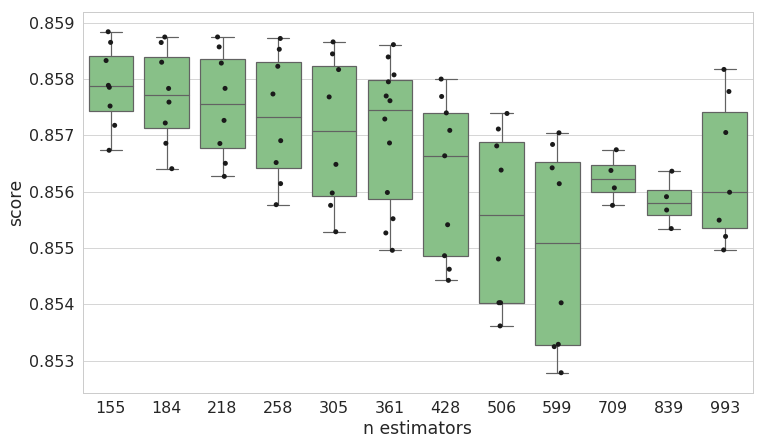

In [79]:
fig, ax = plt.subplots()
sns.boxplot(data=df, x='n estimators', y='score', color=colorcycle[0])
sns.stripplot(data=df, x='n estimators', y='score', color='k') 

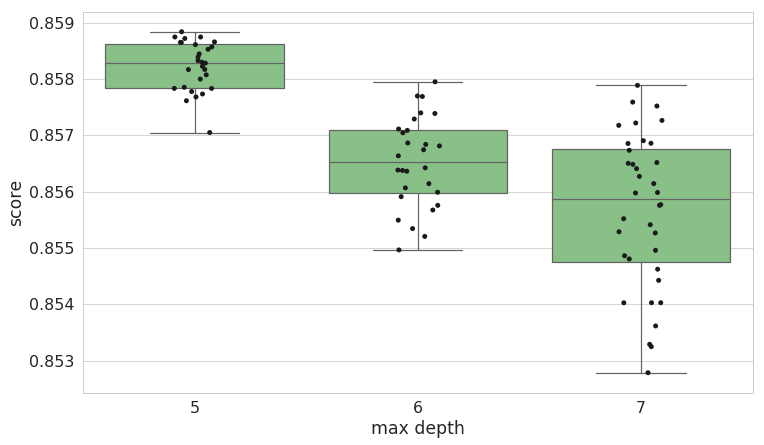

In [80]:
fig, ax = plt.subplots()
sns.boxplot(data=df, y='score', x='max depth', color=colorcycle[0]) 
sns.stripplot(data=df, y='score', x='max depth', color='k') 

In [84]:
df.groupby(['max depth', 'n estimators']).score.mean() 

max depth  n estimators
5          155             0.858416
           184             0.858379
           218             0.858356
           258             0.858300
           305             0.858237
           361             0.858171
           428             0.857998
           993             0.857665
6          361             0.857450
           428             0.857202
           506             0.856923
           599             0.856612
           709             0.856236
           839             0.855824
           993             0.855414
7          155             0.857329
           184             0.857018
           218             0.856723
           258             0.856333
           305             0.855877
           361             0.855433
           428             0.854832
           506             0.854121
           599             0.853340
Name: score, dtype: float64